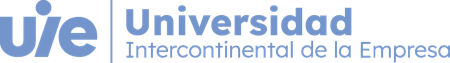

**G25GXX3.10X. Aprendizaje Automático**

**Profesor: Borja González Seoane**

Curso 2025-26

# Modelo Cluster

In [82]:
# Importación de librerías
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import sklearn.model_selection

# Carga de datos

In [83]:
DATA_FILE = 'proy_supermercado_dev_preprocesado_cluster.csv'
MODEL_FILE = 'modelo_regresion.pkl'
TEST_SPLIT = .3
RANDOM_STATE = 23

In [84]:
df = pd.read_csv(DATA_FILE)
display(df)

,educacion,ingresos,hijos_casa,adolescentes_casa,recencia,num_compras_oferta,num_compras_web,num_compras_catalogo,num_compras_tienda,num_visitas_web_mes,...,pct_hist_pescado,pct_hist_dulces,pct_hist_oro,ingresos_x_edad,totalcompras_x_ingresos,compras_per_capita,ratio_recencia_edad,ratio_online_offline,intensidad_compra,campanas_totales
0,-0.447213,0.096059,1.0,1.0,-1.555527,4.0,5.0,1.0,4.0,7.0,...,0.011673,0.023346,0.159533,2614591.0,533590.0,3.333333,0.081633,1.200000,2.000000,0
1,-0.447213,-1.461289,1.0,0.0,-1.693593,2.0,3.0,1.0,2.0,7.0,...,0.120879,0.000000,0.373626,773064.0,128844.0,3.000000,0.000000,1.333333,6.000000,1
2,-0.447213,-0.487513,0.0,0.0,-1.313913,1.0,2.0,1.0,4.0,6.0,...,0.079137,0.021583,0.129496,1615029.0,289877.0,7.000000,0.282051,0.600000,0.583333,0
3,1.522102,0.640411,1.0,2.0,1.102229,7.0,11.0,3.0,4.0,7.0,...,0.012177,0.000000,0.082192,4644288.0,1161072.0,4.500000,1.125000,2.800000,0.219512,0
4,0.537445,-0.309432,1.0,0.0,1.067713,1.0,2.0,0.0,3.0,5.0,...,0.060000,0.000000,0.060000,2072622.0,225285.0,2.500000,1.739130,0.500000,0.061728,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1741,-0.447213,-1.561660,1.0,0.0,0.929647,4.0,4.0,0.0,3.0,9.0,...,0.228571,0.042857,0.100000,854436.0,135933.0,3.500000,1.727273,1.000000,0.090909,0
1742,-0.447213,-0.380498,1.0,1.0,-0.140358,3.0,3.0,1.0,2.0,6.0,...,0.147059,0.044118,0.279412,2572518.0,261612.0,2.000000,0.762712,1.333333,0.130435,0
1743,-0.447213,-1.306702,1.0,1.0,-1.590044,3.0,2.0,0.0,4.0,6.0,...,0.000000,0.090909,0.022727,1281228.0,147834.0,2.000000,0.057692,0.400000,1.500000,0
1744,-0.447213,1.885703,0.0,0.0,1.447392,1.0,4.0,8.0,5.0,1.0,...,0.063556,0.129817,0.162948,3690000.0,1530000.0,17.000000,2.219512,2.000000,0.184783,3


In [85]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inercias = []
K = range(1, 11)  # probar k = 1 a 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE)
    kmeans.fit(df)
    inercias.append(kmeans.inertia_)

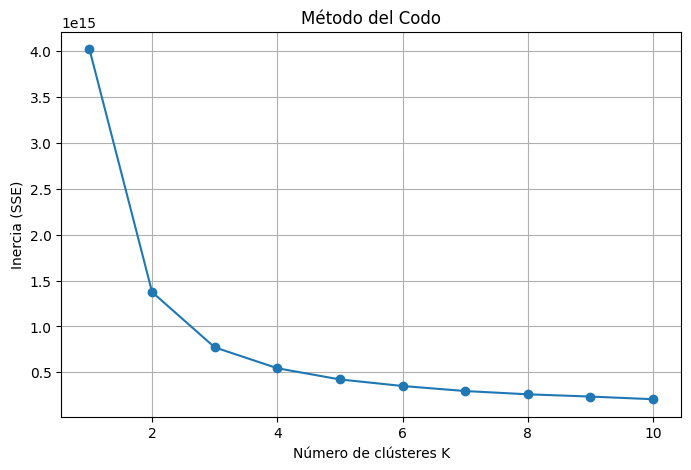

In [86]:
plt.figure(figsize=(8, 5))
plt.plot(K, inercias, marker='o')
plt.xlabel("Número de clústeres K")
plt.ylabel("Inercia (SSE)")
plt.title("Método del Codo")
plt.grid(True)
plt.show()

In [87]:
# Ponemos la función que creamos para graficar los clústeres en 3d
from typing import Optional
from matplotlib import cm
def plot_data_3D(
    data: np.ndarray, labels: Optional[np.ndarray] = None, title: Optional[str] = None
) -> None:
    """
    Función auxiliar para graficar datos en 3D. Se espera que `X` tenga 3 columnas.

    :param X: Datos a graficar.
    :param labels: Etiquetas de los datos, para colorearlos. Si no se proveen, los datos se grafican en un único color.
    :param title: Título del gráfico.
    """
    assert data.shape[1] == 3, "Se esperan 3 columnas en X."

    # Use Seaborn style
    plt.style.use("default")
    # Ignore the Matplotlib deprecation warnings
    plt.rcParams.update({"figure.max_open_warning": 0})

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection="3d")

    if labels is None:
        ax.scatter(data[:, 0], data[:, 1], data[:, 2], s=100)
    else:
        ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, s=100, cmap=cm.jet)

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    if title is not None:
        ax.set_title(title)

    plt.show()

In [88]:
# Hacemos los clusters con KMeans de sklearn para comparar
kmeans_sklearn = KMeans(n_clusters=4, random_state=RANDOM_STATE, init="k-means++", n_init=50, max_iter=500)
kmeans_sklearn.fit(df.values)
labels_sklearn = kmeans_sklearn.predict(df.values)

In [89]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_3d_pca = pca.fit_transform(df)

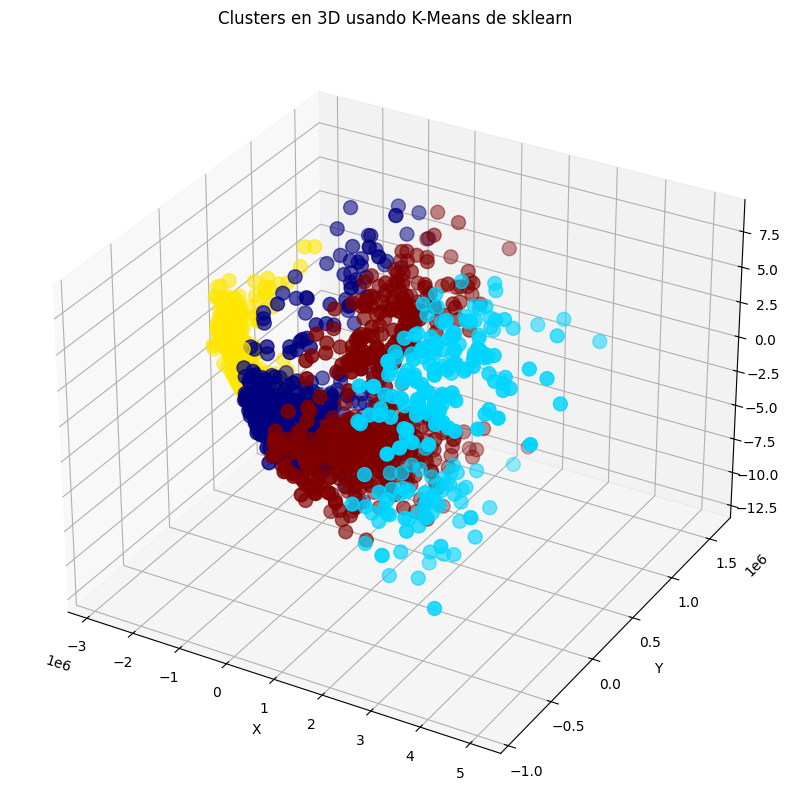

In [90]:
plot_data_3D(
    data=X_3d_pca,
    labels=labels_sklearn,
    title="Clusters en 3D usando K-Means de sklearn"
)

In [91]:

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df.values, labels_sklearn)

print(f"\nSILHOUETTE SCORE : {silhouette_avg:.4f}")



SILHOUETTE SCORE : 0.4465


In [92]:
# Pegamos el k-means from sracth que realizamos en la práctica anterior
from typing import Optional, Literal
class KMeansScratch:
    def __init__(
        self,
        k: int,
        max_iter: int = 1000,
        random_state: Optional[int] = None,
        tol: float = 1e-4,  # Tolerancia para la convergencia. Frobenius
        init: Literal["random", "k-means++"] = "random",
    ):
        # Validación de parámetros
        # k, max_iter: enteros positivos
        # tol: positivo

        self.k = k
        self.max_iter = max_iter
        self.random_state = random_state
        self.tol = tol
        self.init = init

        self._centroides = None
        self._labels = None
        self._inertia = None
        self._n_iter = 0
    
    def __inicializa_centroides(self, X: np.ndarray) -> np.ndarray:
        rng = np.random.default_rng(self.random_state)
        if self.init == "random":
           return self.__inicializa_centroides_random(X, rng)
        elif self.init == "k-means++":
           return self.__inicializa_centroides_mas_mas(X, rng)
        else:
           raise ValueError(f"Método de inicialización '{self.init}' no soportado.")
        
        
    def __inicializa_centroides_random(self, X: np.ndarray,
        rng: np.random.Generator
    ) -> np.ndarray:
        indices = rng.choice(X.shape[0], self.k, replace=False)
        return X[indices].copy()
    
    
    def __inicializa_centroides_mas_mas(self, X: np.ndarray,
       rng: np.random.Generator
    ) -> np.ndarray:
        centroides = np.zeros((self.k, X.shape[1]))
        
        # Elegimos el primer centroide aleatoriamente
        indices = rng.choice(X.shape[0], 1, replace=False)
        centroides[0] = X[indices].copy()
        
        for k in range(1, self.k):
            # Calculamos la distancia mínima de cada punto a los centroides ya elegidos
            distancias = np.min(
                np.sum((X[:, np.newaxis, :] - centroides[np.newaxis, :k, :]) ** 2, axis=2),
                axis=1
            )
            # Probabilidad proporcional a la distancia al cuadrado
            probabilidad = distancias / np.sum(distancias)
            indice_elegido = rng.choice(X.shape[0], 1, p=probabilidad)
            centroides[k] = X[indice_elegido].copy()
        
        return centroides


    def __asignar_clusteres(self, X: np.ndarray) -> np.ndarray:
        
        distancias = np.zeros((X.shape[0], self.k))

        for k in range(self.k):
            # Distancia a cada punto con respecto al centroide 'k'
            distancias[:, k] = np.sum((X - self._centroides[k]) ** 2, axis=1)

        return np.argmin(distancias, axis=1)
    

    def __actualizar_centroides(self, X: np.ndarray,
                                 clusteres: np.ndarray) -> np.ndarray:
        centroides = np.zeros(
            (self.k, X.shape[1]))
        
        for k in range(self.k):
            mask = clusteres == k

            centroides[k] = np.mean(X[mask], axis=0)
            
        return centroides


    

    def __convergencia_frobenius(self,
                                centroides_antiguos: np.ndarray,
                                centroides_nuevos: np.ndarray,
                                tol: float) -> bool:
        norma_frobenius = np.linalg.norm(
            centroides_nuevos - centroides_antiguos,
              ord='fro')
        return bool(norma_frobenius < tol)


    def fit(self, X: np.ndarray):
        self._centroides = self.__inicializa_centroides(X)
        self._n_iter = 0

        for iter_n in range(self.max_iter):
            self._n_iter += 1

            # Asignamos clusters
            self._labels = self.__asignar_clusteres(X)

            # Actualizamos centroides
            centroides_nuevos = self.__actualizar_centroides(X, self._labels)

            if self.__convergencia_frobenius(self._centroides,
                 centroides_nuevos,
                 self.tol):
                break
            self._centroides = centroides_nuevos

    def predict(self, X: np.ndarray) -> np.ndarray:
        if self._centroides is None:
            raise ValueError("El modelo no ha sido entrenado todavía. Llámase a 'fit()' primero.")
        
        return self.__asignar_clusteres(X)

        

In [93]:
kmeans = KMeansScratch(k=4,random_state=RANDOM_STATE,  init="k-means++")
kmeans.fit(df.values)       
labels_train = kmeans.predict(df.values)

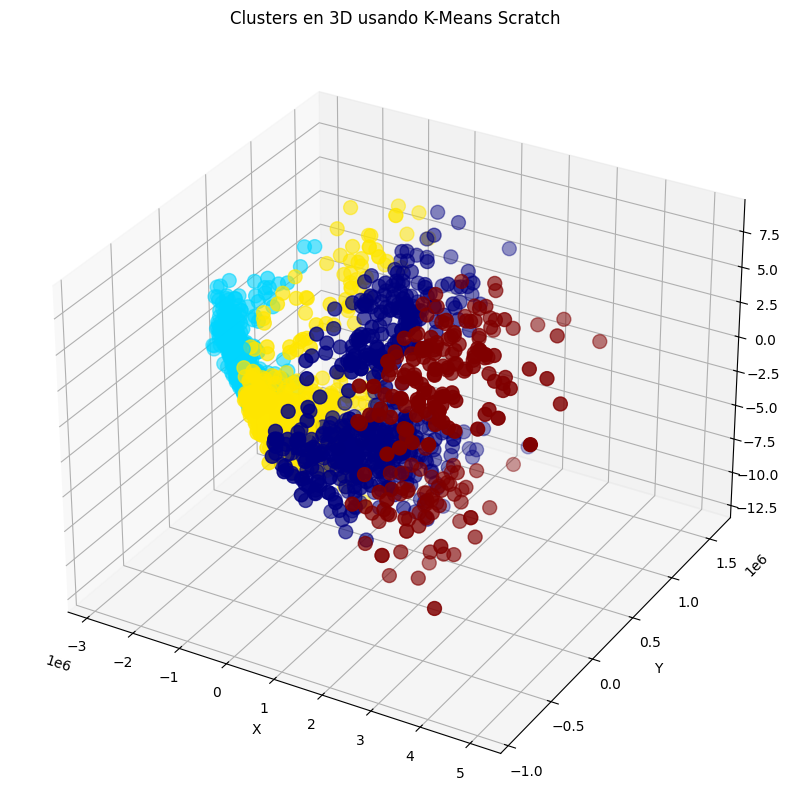

In [94]:
plot_data_3D(
    data=X_3d_pca,
    labels=labels_train,
    title="Clusters en 3D usando K-Means Scratch"
)


In [95]:


from sklearn.metrics import silhouette_score

# Calcular Silhouette Score para K=4
silhouette_avg = silhouette_score(df.values, labels_train)

print(f"\nSILHOUETTE SCORE (K=4): {silhouette_avg:.4f}")



SILHOUETTE SCORE (K=4): 0.4465


In [96]:
import pandas as pd
import numpy as np

# Cargamos el dataset preprocesado que usamos para clustering.

df_original = pd.read_csv('proy_supermercado_dev_preprocesado_cluster.csv')

# Asociamos a cada fila la etiqueta de cluster correspondiente.
# De este modo podremos calcular estadísticas por grupo y comparar sus perfiles.
df_original['cluster'] = labels_train


# Elegimos un subconjunto de variables clave para comparar los clusters de un vistazo.
# La idea es poder decir rápido quién tiene más ingresos, quién compra más, etc.
variables_comp = ['ingresos', 'gasto_total', 'num_compras_totales', 'edad',
                  'recencia', 'campanas_totales', 'intensidad_compra',
                  'hijos_casa', 'num_compras_web', 'num_compras_oferta']
variables_comp = [v for v in variables_comp if v in df_original.columns]

# Construimos una tabla donde cada fila es una variable
# y cada columna C0, C1, C2, C3 es la media de esa variable en el cluster.
comparacion = []
for var in variables_comp:
    row = {'Variable': var}
    for cluster_id in range(4):
        cluster_data = df_original[df_original['cluster'] == cluster_id]
        row[f'C{cluster_id}'] = f"{cluster_data[var].mean():.2f}"
    comparacion.append(row)

df_comparacion = pd.DataFrame(comparacion)

# Mostramos la tabla final; a partir de aquí ya podemos interpretar y poner nombres a los clusters.
print(df_comparacion.to_string(index=False))


          Variable   C0    C1    C2   C3
          ingresos 0.71 -1.17 -0.20 1.31
              edad 0.19 -0.68 -0.03 1.09
          recencia 0.02 -0.04  0.01 0.01
  campanas_totales 0.29  0.09  0.12 0.49
 intensidad_compra 0.76  0.27  0.53 0.95
        hijos_casa 0.15  0.84  0.59 0.06
   num_compras_web 5.57  2.08  3.59 5.46
num_compras_oferta 2.33  1.97  2.78 1.59



## **Cluster 0  - "Compradores de Clase Media-Alta"**

**Perfil demográfico:**
Este segmento presenta ingresos significativamente superiores a la media (0.71), con una edad media (0.19) que corresponde a adultos establecidos en su trayectoria profesional. La composición familiar muestra pocos hijos pequeños (0.15) pero una presencia notable de adolescentes en el hogar (0.66).

**Comportamiento de compra:**
Observamos una alta actividad multicanal, con 5.57 compras por web y frecuencia similar en tienda física. La intensidad de compra es elevada (0.76), aunque el uso de ofertas es moderado (2.33). La respuesta a campañas de marketing alcanza un 0.29, situándose en un nivel intermedio.

**Interpretación:** Se trata de familias con buena capacidad adquisitiva que mantienen hábitos de compra regulares tanto online como offline. Su menor dependencia de ofertas sugiere que priorizan la conveniencia sobre el precio.



## **Cluster 1  - "Familias Jóvenes con Restricciones Económicas"**

**Perfil demográfico:**
Este cluster presenta los ingresos más bajos de todos los segmentos (-1.17) y la edad más juvenil (-0.68). Destaca por tener el mayor número de hijos pequeños en el hogar (0.84), lo que incrementa significativamente las cargas familiares.

**Comportamiento de compra:**
La frecuencia de compra es la más baja observada, con apenas 2.08 compras web y 3.04 en tienda. La intensidad de compra es mínima (0.27), sugiriendo que se limitan a adquisiciones básicas. La respuesta a campañas es prácticamente nula (0.09).

**Interpretación:** Familias jóvenes con presupuestos muy ajustados que realizan compras estrictamente necesarias. El bajo engagement sugiere falta de capacidad económica para responder a incentivos comerciales.



## **Cluster 2 - "Familias Numerosas Orientadas a Promociones"**

**Perfil demográfico:**
Presenta ingresos ligeramente por debajo de la media (-0.20) y edad media (-0.03). Lo más característico es la alta carga familiar, con presencia tanto de hijos (0.59) como de adolescentes (0.74) en el hogar.

**Comportamiento de compra:**
La frecuencia de compra es media (3.59 web, 4.80 tienda), pero destaca especialmente por el máximo uso de ofertas del total de clusters (2.78). La intensidad de compra es moderada (0.53), mientras que la respuesta a campañas permanece baja (0.12).

**Interpretación:** Familias con múltiples dependientes que necesitan optimizar cada compra. Buscan activamente promociones y descuentos, siendo el segmento más sensible al precio debido a las necesidades de un hogar numeroso.



## **Cluster 3 - "Clientes Premium de Alto Valor"**

**Perfil demográfico:**
Este segmento minoritario pero estratégico presenta los ingresos más elevados (1.31) y la mayor edad (1.09), correspondiente a clientes maduros o seniors. Se caracteriza por la ausencia casi total de cargas familiares, con mínima presencia de hijos (0.06) y adolescentes (0.34).

**Comportamiento de compra:**
Mantiene la frecuencia de compra más alta (5.46 web, 8.52 tienda) y la máxima intensidad (0.95). Significativamente, presenta el menor uso de ofertas (1.59), indicando menor sensibilidad al precio. La respuesta a campañas alcanza su máximo (0.49).

**Interpretación:** Segmento de máximo valor estratégico. Clientes maduros sin dependientes económicos, con alto poder adquisitivo y lealtad demostrada. Priorizan calidad sobre precio y muestran mayor receptividad a comunicaciones comerciales dirigidas.



## Implicaciones estratégicas

La segmentación en cuatro clusters permite diseñar estrategias comerciales diferenciadas según el perfil y necesidades de cada grupo. El Cluster 3, aunque minoritario, representa el segmento de mayor valor por cliente, mientras que los Clusters 1 y 2 requieren aproximaciones centradas en precio. El Cluster 0 constituye un segmento intermedio con potencial de fidelización a largo plazo.



# Comparación con 3 clústeres y por que nos quedamos con 4

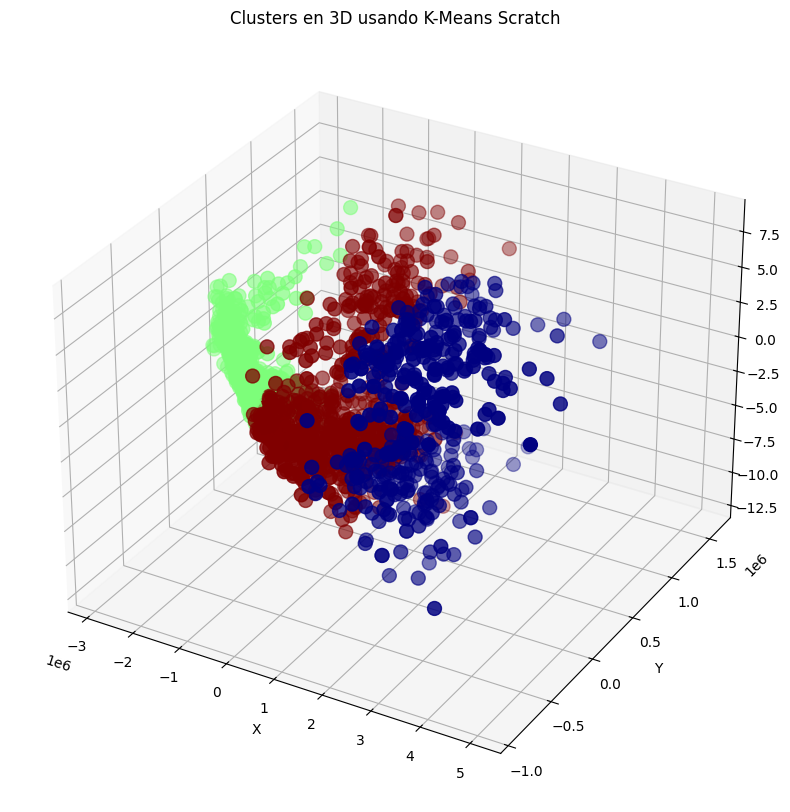

In [97]:
kmeans = KMeansScratch(k=3,random_state=RANDOM_STATE,  init="k-means++")
kmeans.fit(df.values)       
labels_train = kmeans.predict(df.values)
plot_data_3D(
    data=X_3d_pca,
    labels=labels_train,
    title="Clusters en 3D usando K-Means Scratch"
)

In [98]:
from sklearn.metrics import silhouette_score

# Calcular Silhouette Score para K=4
silhouette_avg = silhouette_score(df.values, labels_train)

print(f"\nSILHOUETTE SCORE (K=4): {silhouette_avg:.4f}")



SILHOUETTE SCORE (K=4): 0.4939


In [99]:
import pandas as pd
import numpy as np

# Cargamos el dataset preprocesado que usamos para clustering.

df_original = pd.read_csv('proy_supermercado_dev_preprocesado_cluster.csv')

# Asociamos a cada fila la etiqueta de cluster correspondiente.
# De este modo podremos calcular estadísticas por grupo y comparar sus perfiles.
df_original['cluster'] = labels_train


# Elegimos un subconjunto de variables clave para comparar los clusters de un vistazo.
# La idea es poder decir rápido quién tiene más ingresos, quién compra más, etc.
variables_comp = ['ingresos', 'gasto_total', 'num_compras_totales', 'edad',
                  'recencia', 'campanas_totales', 'intensidad_compra',
                  'hijos_casa', 'num_compras_web', 'num_compras_oferta']
variables_comp = [v for v in variables_comp if v in df_original.columns]

# Construimos una tabla donde cada fila es una variable
# y cada columna C0, C1, C2, C3 es la media de esa variable en el cluster.
comparacion = []
for var in variables_comp:
    row = {'Variable': var}
    for cluster_id in range(3):
        cluster_data = df_original[df_original['cluster'] == cluster_id]
        row[f'C{cluster_id}'] = f"{cluster_data[var].mean():.2f}"
    comparacion.append(row)

df_comparacion = pd.DataFrame(comparacion)

# Mostramos la tabla final; a partir de aquí ya podemos interpretar y poner nombres a los clusters.
print(df_comparacion.to_string(index=False))


          Variable   C0    C1    C2
          ingresos 1.15 -0.99  0.34
              edad 0.84 -0.51  0.03
          recencia 0.03 -0.00 -0.01
  campanas_totales 0.44  0.09  0.21
 intensidad_compra 0.89  0.30  0.69
        hijos_casa 0.06  0.83  0.31
   num_compras_web 5.62  2.27  4.83
num_compras_oferta 1.74  2.13  2.68


La elección de cuatro clústeres frente a tres está plenamente justificada porque permite desglosar el grupo de clientes con mayor poder adquisitivo en dos perfiles de comportamiento muy diferenciados, algo que el modelo de tres grupos no consigue captar. En la solución de tres clústeres, observamos un único grupo (C0) que aglutina a todos los usuarios con ingresos altos y edad avanzada, mezclando indiscriminadamente a clientes "ricos" con clientes muy ricos y diluyendo las diferencias en sus patrones de consumo digital. Esta generalización impediría diseñar estrategias de marketing precisas, ya que estaríamos tratando por igual a perfiles que, aunque comparten un estatus económico alto, interactúan con la marca de formas muy distintas.

Al pasar al modelo de cuatro clústeres, este gran grupo se divide revelando un matiz estratégico fundamental: la distinción entre una élite económica y unos super-usuarios digitales. Por un lado, emerge el clúster C3, que representa el techo de capacidad económica con unos ingresos estandarizados de 1.31 y una edad más avanzada, perfilándose como el cliente ideal para campañas de productos exclusivos o de lujo tradicional. Por otro lado, se separa el clúster C0, que aunque tiene ingresos algo menores (0.71), destaca sobresalientemente por su comportamiento en el canal online, con un indicador de compras web de 5.57, muy superior al resto.

En definitiva, la solución de cuatro clústeres aporta una granularidad operativa indispensable. Mientras que el modelo de tres grupos nos obligaría a enviar el mismo mensaje a todos los clientes de nivel alto, la segmentación en cuatro nos permite especializar nuestra comunicación: fidelización digital y promociones de e-commerce para el grupo C0, y atención personalizada o catálogo premium para el grupo C3. Esta capacidad para discriminar no solo por cuánto tienen sino por cómo gastan justifica sobradamente la complejidad adicional de añadir un cuarto clúster